#### Goal of the project is to build a ML model for column "Consumer disputed" on a Consumer complaints dataset. Specifically the model shall predict if any consumer is disagreed to the  provided solution or not. It is a binary classification problem.

### Importing all the necessary python packages

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from time import time
import warnings
warnings.filterwarnings('ignore')


### Loading the dataset into pandas dataframe and exploring valuable insights

#### In the project, 3 datasets are being provided.  
- For training the model : 'Consumer_Complaints_train.csv'
- For testing the model:  'Consumer_Complaints_test_share.csv'
- Actual output dataset for checking the model accuracy: 'sample_submission.csv'

In [2]:
# Read Training dataset
#csv file is provided here without path, because its present in the folder where this notebook is present.
data= pd.read_csv('Consumer_Complaints_train.csv')

In [3]:
# Read Testing dataset
data_test= pd.read_csv('Consumer_Complaints_test_share.csv')

In [4]:
# Calculating no of rows and columns of Traing dataset(no of Rows= 478421, no of columns= 18)
# Calculating no of rows and columns of Test dataset(no of Rows= 119606, no of columns= 17)

print('Train dataset shape: ',data.shape,'\n')
print('Test dataset shape:',data_test.shape)

Train dataset shape:  (478421, 18) 

Test dataset shape: (119606, 17)


In [5]:
# Displaying column names of training dataset
data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [6]:
# Displaying column names of test dataset
data_test.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')

In [7]:
#Displaying top 5 values in a dataframe
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2014-05-15,Credit card,NaN,Billing statement,NaN,NaN,NaN,Wells Fargo & Company,MI,48342,Older American,NaN,Web,2014-05-16,Closed with explanation,Yes,No,856103
1,2014-09-18,Bank account or service,(CD) Certificate of deposit,"Making/receiving payments, sending money",NaN,NaN,NaN,Santander Bank US,PA,18042,NaN,NaN,Referral,2014-09-24,Closed,Yes,No,1034666
2,2014-03-13,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Equifax,CA,92427,NaN,NaN,Referral,2014-04-03,Closed with non-monetary relief,Yes,No,756363
3,2015-07-17,Credit card,NaN,Billing statement,NaN,"My credit card statement from US Bank, XXXX. X...",Company chooses not to provide a public response,U.S. Bancorp,GA,305XX,Older American,Consent provided,Web,2015-07-17,Closed with monetary relief,Yes,No,1474177
4,2014-11-20,Credit card,NaN,Transaction issue,NaN,NaN,NaN,Bank of America,MA,02127,NaN,NaN,Web,2014-11-28,Closed with explanation,Yes,No,1132572


In [8]:
data_test.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2014-01-18,Bank account or service,Cashing a check without an account,Deposits and withdrawals,NaN,NaN,NaN,Bank of America,CA,95691,NaN,NaN,Web,2014-01-17,Closed with explanation,Yes,675956
1,2016-03-31,Debt collection,Credit card,Cont'd attempts collect debt not owed,Debt was paid,NaN,NaN,"National Credit Adjusters, LLC",FL,32086,NaN,Consent not provided,Web,2016-03-31,Closed with explanation,Yes,1858795


In [9]:
# Displaying concise summary of the training dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478421 entries, 0 to 478420
Data columns (total 18 columns):
Date received                   478421 non-null object
Product                         478421 non-null object
Sub-product                     339948 non-null object
Issue                           478421 non-null object
Sub-issue                       185796 non-null object
Consumer complaint narrative    75094 non-null object
Company public response         90392 non-null object
Company                         478421 non-null object
State                           474582 non-null object
ZIP code                        474573 non-null object
Tags                            67206 non-null object
Consumer consent provided?      135487 non-null object
Submitted via                   478421 non-null object
Date sent to company            478421 non-null object
Company response to consumer    478421 non-null object
Timely response?                478421 non-null object
Consumer dis

In [10]:
# Displaying concise summary of the testing dataset
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119606 entries, 0 to 119605
Data columns (total 17 columns):
Date received                   119606 non-null object
Product                         119606 non-null object
Sub-product                     84854 non-null object
Issue                           119606 non-null object
Sub-issue                       46546 non-null object
Consumer complaint narrative    18557 non-null object
Company public response         22776 non-null object
Company                         119606 non-null object
State                           118681 non-null object
ZIP code                        118680 non-null object
Tags                            16871 non-null object
Consumer consent provided?      33864 non-null object
Submitted via                   119605 non-null object
Date sent to company            119606 non-null object
Company response to consumer    119606 non-null object
Timely response?                119606 non-null object
Complaint ID   



### Data pre-processing for training dataset:

*Data Preprocessing is a technique that is used to convert the raw data into a clean data set.  For achieving better results from the applied model in Machine Learning projects the format of the data has to be in a proper manner.*

*Steps are as follows:*

* Rename Consumer disputed column to Target

* Calculate difference of dates in terms of days

* Check missing values and replace missing values with the mode(most frequent value) of that perticular column in a dataframe.

* Use Level encoding and One HOT encoding for converting categorical values to neumeric.
    - The column which has just two values like yes or no can be directly converted to '1' for yes and '0' for no.For other columns which has multiple values, one way would be to create as many columns as many values that it refelcts and assign 1 to them and 0 to others.This can be done using pandas 'get_dummies' function.
    
* Drop columns which are less significant

* Split the training dataset into input dataframe and expected output panda series


In [11]:
#Rename the "Consumer disputed?"" column name into "Target"
data.rename(columns={'Consumer disputed?':'Target'},inplace=True)

In [12]:
data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Target', 'Complaint ID'],
      dtype='object')

**Label encoding is simply converting each value in a column to a number. Here values of Target colum is converted into 0 and 1.** 
*yes converted to 1 and no converted to 0*

In [13]:
le= LabelEncoder() #initializing Level Encoder
data['Target']= le.fit_transform(data['Target'])

In [14]:
#Pandas to_datetime() method helps to convert string Date time into Python Date time object.

data['Date received']=pd.to_datetime(data['Date received'],infer_datetime_format=True)
data['Date sent to company']=pd.to_datetime(data['Date sent to company'],infer_datetime_format=True)

#pd.to_numeric() function to convert a column into a numeric data type
#Here date difference is calculated in terms of days
data['date_difference']=pd.to_numeric((data['Date sent to company']-data['Date received']).dt.days)


In [15]:
data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Target', 'Complaint ID', 'date_difference'],
      dtype='object')

In [16]:
#Splitting the training dataset into X_train(using as input for the model) and y_train(expected outcomes/labels)
#.drop() function is use to drop Columns from a Dataframe.
# Here less significant columns are dropped

X_train= data.drop(['Date received','Sub-product','Sub-issue','Consumer complaint narrative','Company public response',
                    'Company','ZIP code','Date sent to company','Complaint ID','Target' ],axis=1)
y_train= data['Target']

In [17]:
X_train.columns

Index(['Product', 'Issue', 'State', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Company response to consumer', 'Timely response?',
       'date_difference'],
      dtype='object')

In [18]:
#The value_counts() function is used to get a Series containing counts of unique values.
y_train.value_counts()

0    376990
1    101431
Name: Target, dtype: int64

In [19]:
X_train.head()

,Product,Issue,State,Tags,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,date_difference
0,Credit card,Billing statement,MI,Older American,NaN,Web,Closed with explanation,Yes,1
1,Bank account or service,"Making/receiving payments, sending money",PA,NaN,NaN,Referral,Closed,Yes,6
2,Credit reporting,Incorrect information on credit report,CA,NaN,NaN,Referral,Closed with non-monetary relief,Yes,21
3,Credit card,Billing statement,GA,Older American,Consent provided,Web,Closed with monetary relief,Yes,0
4,Credit card,Transaction issue,MA,NaN,NaN,Web,Closed with explanation,Yes,8


In [20]:
# isnull().sum() returns the number of missing values in the data set for each column

X_train.isnull().sum()

Product                              0
Issue                                0
State                             3839
Tags                            411215
Consumer consent provided?      342934
Submitted via                        0
Company response to consumer         0
Timely response?                     0
date_difference                      0
dtype: int64

In [21]:
X_train.columns

Index(['Product', 'Issue', 'State', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Company response to consumer', 'Timely response?',
       'date_difference'],
      dtype='object')

In [22]:
# .fillna(X_train[i].mode()[0]) is used to impute missing values with the mode(most frequent value) in a dataframe.
# col_train represents the list of column names which have null values

col_train= ['State', 'Tags','Consumer consent provided?']

for i in col_train:
    if X_train[i].isnull().sum()!= 0:
        X_train[i]=X_train[i].fillna(X_train[i].mode()[0])
        



In [23]:
X_train.isnull().sum()

Product                         0
Issue                           0
State                           0
Tags                            0
Consumer consent provided?      0
Submitted via                   0
Company response to consumer    0
Timely response?                0
date_difference                 0
dtype: int64

**One-hot encoding is a representation of categorical variables as binary vectors and it creates unique row values as a column.**

In [24]:
# The get_dummies() function is used to convert categorical variable into dummy/indicator variables.
# col_train represents list of column names which have categorical values.

col_train= ['Product','Issue', 'State', 'Tags','Consumer consent provided?', 
            'Submitted via', 'Company response to consumer','Timely response?']
for i in col_train:
    dummy= pd.get_dummies(X_train[i],prefix=i)
    dummy= dummy.iloc[:,:-1]
    X_train= pd.concat([X_train,dummy],axis=1)
    X_train=X_train.drop([i],1)
    

In [25]:
X_train.head()

,date_difference,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,...,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_No
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,6,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,21,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,8,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [26]:
X_train.shape

(478421, 184)



### Data pre-processing for testing dataset



*Data pre-processing steps are same as like for testing dataset*

In [27]:
data_test.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')

In [28]:
data_test['Date received']=pd.to_datetime(data_test['Date received'],infer_datetime_format=True)
data_test['Date sent to company']=pd.to_datetime(data_test['Date sent to company'],infer_datetime_format=True)

data_test['date_difference']=pd.to_numeric((data_test['Date sent to company']-data_test['Date received']).dt.days)


In [29]:
data_test['date_difference']

0        -1
1         0
2         1
3         5
4         0
         ..
119601    6
119602    0
119603    3
119604    1
119605    0
Name: date_difference, Length: 119606, dtype: int64

In [30]:
data_test.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID', 'date_difference'],
      dtype='object')

In [31]:
X_test= data_test.drop(['Date received','Sub-product','Sub-issue','Consumer complaint narrative',
                   'Company public response', 'Company','ZIP code','Date sent to company', 'Complaint ID'],axis=1)

In [32]:
X_test.columns

Index(['Product', 'Issue', 'State', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Company response to consumer', 'Timely response?',
       'date_difference'],
      dtype='object')

In [33]:
X_test.isnull().sum()

Product                              0
Issue                                0
State                              925
Tags                            102735
Consumer consent provided?       85742
Submitted via                        1
Company response to consumer         0
Timely response?                     0
date_difference                      0
dtype: int64

In [34]:
col_test= [ 'State', 'Tags','Consumer consent provided?', 
            'Submitted via']

for i in col_test:
    if X_test[i].isnull().sum()!= 0:
        X_test[i]=X_test[i].fillna(X_test[i].mode()[0])
        

In [35]:
X_test.isnull().sum()

Product                         0
Issue                           0
State                           0
Tags                            0
Consumer consent provided?      0
Submitted via                   0
Company response to consumer    0
Timely response?                0
date_difference                 0
dtype: int64

In [36]:
col_test= ['Product','Issue', 'State', 'Tags','Consumer consent provided?', 
            'Submitted via', 'Company response to consumer','Timely response?']
for i in col_test:
    dummy= pd.get_dummies(X_test[i],prefix=i)
    dummy= dummy.iloc[:,:-1]
    X_test= pd.concat([X_test,dummy],axis=1)
    X_test=X_test.drop([i],1)

In [37]:
X_test.head()

,date_difference,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,...,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_No
0,-1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,5,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [38]:
X_test.shape

(119606, 183)

In [39]:
X_train.shape

(478421, 184)

*Featue Columns of X_train(input dataframe for train the model) and X_test(input dataframe for test the model) must be same*


In [40]:
#common_column represents list of common feature_column names for X_train and X_test
common_column=X_train.columns & X_test.columns

In [41]:
#Adding common column to X_train and X_test

X_train= X_train[common_column]
X_test= X_test[common_column]

In [42]:
X_train.shape

(478421, 183)

In [43]:
X_test.shape

(119606, 183)

In [44]:
y_train.shape

(478421,)

## Data pre-processing for actual value

In [45]:
# Read actual output dataset

true_value= pd.read_csv('sample_submission.csv')

In [46]:
#display top 5 values of output dataset
true_value.head()

,Complaint ID,Consumer disputed?
0,675956,Yes
1,1858795,No
2,32637,No
3,1731374,No
4,501487,No


In [47]:
#shape is to obtain number of rows and columns in the dataframe.
#first index value is no. of rows and second is no. of columns
true_value.shape

(119606, 2)

In [48]:
#The value_counts() function is used to get a Series containing counts of unique values.
true_value['Consumer disputed?'].value_counts()

No     118193
Yes      1413
Name: Consumer disputed?, dtype: int64

In [49]:
true_value.rename(columns={'Consumer disputed?':'Target'},inplace=True)

In [50]:
le= LabelEncoder()
true_value['Target']= le.fit_transform(true_value['Target'])

In [51]:
y_true= true_value['Target']

In [52]:
y_true.value_counts()

0    118193
1      1413
Name: Target, dtype: int64

In [53]:
y_train.value_counts()

0    376990
1    101431
Name: Target, dtype: int64

### Apply Logistic Regression without balancing the dataset

In [54]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
start = time()
logreg.fit(X_train,y_train)
end = time()
# Print the results
print("Trained model in {:.4f} seconds".format(end - start))

# predict the response values for the observations in X_test
start = time()
y_predicted = logreg.predict(X_test)
end = time()
print("Made predictions in {:.4f} seconds.".format(end - start))

# compute classification accuracy for the logistic regression model
print("Train Accuracy {:.2%}".format(accuracy_score(y_true,y_predicted)))

Trained model in 19.5715 seconds
Made predictions in 0.4209 seconds.
Train Accuracy 98.82%


In [55]:
#Confusion matric is the table that describes the performance of a classification model
#The classification report visualizer displays the precision, recall, F1, and support scores for the model
from sklearn.metrics import confusion_matrix,classification_report

print("Classification Report")
print (classification_report(y_true,y_predicted))

print ("Confusion matrix")
print (confusion_matrix(y_true,y_predicted))

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    118193
           1       0.00      0.00      0.00      1413

    accuracy                           0.99    119606
   macro avg       0.49      0.50      0.50    119606
weighted avg       0.98      0.99      0.98    119606

Confusion matrix
[[118192      1]
 [  1413      0]]


In [56]:
# prob of zero, prob of 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.29624464, 0.19687613, 0.33824382, ..., 0.22173593, 0.20332198,
       0.23774281])

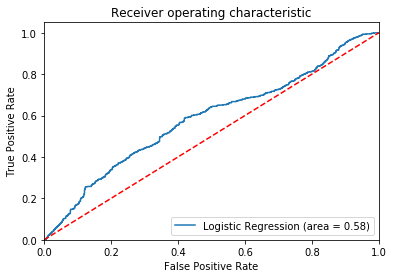

In [57]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_true,  y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_true, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [58]:
#Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
fpr, tpr, threshold = metrics.roc_curve(y_true,y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.5836742163454045

## Applying XGBOOST

In [59]:
from xgboost.sklearn import XGBClassifier

xgb=XGBClassifier()
start=time()
xgb.fit(X_train,y_train)
end=time()
print("Trained model in {:.4f} seconds".format(end - start),'\n')

# predict the response values for the observations in X_test
start = time()
y_predicted_xgb = xgb.predict(X_test)
end = time()
print("Made predictions in {:.4f} seconds.".format(end - start),'\n')

#displaying accuracy score of the XGBOOST model
print("Train Accuracy {:.2%}".format(accuracy_score(y_true,y_predicted_xgb)),'\n')

#calculating probability of predicted values
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]

#Compute Receiver operating characteristic (ROC)
fpr, tpr, threshold = metrics.roc_curve(y_true,y_pred_prob_xgb)

#compute AUC ROC score
roc_auc_xgb = metrics.auc(fpr, tpr)

print ('Classification Report: \n',classification_report(y_true,y_predicted_xgb),'\n')

print ('Confusion Matrix: \n',confusion_matrix(y_true,y_predicted_xgb),'\n')

print('ROC_AUC score: ',roc_auc_xgb)

Trained model in 340.3871 seconds 

Made predictions in 1.3281 seconds. 

Train Accuracy 98.82% 

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    118193
           1       0.00      0.00      0.00      1413

    accuracy                           0.99    119606
   macro avg       0.49      0.50      0.50    119606
weighted avg       0.98      0.99      0.98    119606
 

Confusion Matrix: 
 [[118193      0]
 [  1413      0]] 

ROC_AUC score:  0.597325539179387


## Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier


dtree = DecisionTreeClassifier(max_features = 'sqrt')
start=time()
dtree.fit(X_train,y_train)
end=time()
print("Trained model in {:.4f} seconds".format(end - start),'\n')

# predict the response values for the observations in X_test
start = time()
y_predicted_dt = dtree.predict(X_test)
end = time()
print("Made predictions in {:.4f} seconds.".format(end - start),'\n')


from sklearn.metrics import accuracy_score
print("Train Accuracy {:.2%}".format(accuracy_score(y_true,y_predicted_dt)),'\n')

y_pred_prob_dt = dtree.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_true,y_pred_prob_dt)
roc_auc_dt = metrics.auc(fpr, tpr)

print ('Classification Report: \n',classification_report(y_true,y_predicted_dt),'\n')

print ('Confusion Matrix: \n',confusion_matrix(y_true,y_predicted_dt),'\n')

print('ROC_AUC score: ',roc_auc_dt)

Trained model in 8.5715 seconds 

Made predictions in 0.4506 seconds. 

Train Accuracy 93.13% 

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.94      0.96    118193
           1       0.02      0.08      0.03      1413

    accuracy                           0.93    119606
   macro avg       0.50      0.51      0.50    119606
weighted avg       0.98      0.93      0.95    119606
 

Confusion Matrix: 
 [[111271   6922]
 [  1299    114]] 

ROC_AUC score:  0.48543813889536613


### Applying SMOTE

In [62]:
#SMOTE is an oversampling technique that generates synthetic samples from the minority class.
smt = SMOTE(random_state = 121, sampling_strategy = 'auto')

start=time()
X_train_smote, y_train_smote = smt.fit_sample(X_train, y_train)
end=time()

print("Model oversampling using SMOTE needs {:.4f} seconds".format(end - start),'\n')
print("shape of y before ",np.bincount(y_train),'\n')
print("shape of y after applying SMOTE ",np.bincount(y_train_smote))

Model oversampling using SMOTE needs 1446.2870 seconds 

shape of y before  [376990 101431] 

shape of y after applying SMOTE  [376990 376990]


In [63]:
X_train_smote= pd.DataFrame(X_train_smote,columns=X_train.columns)

In [64]:
X_test= X_test.reindex(X_train_smote.columns,axis=1)

## Applying Logistic regression after applying SMOTE

In [66]:
logreg = LogisticRegression()
start=time()
logreg.fit(X_train_smote,y_train_smote)
end=time()
print("Trained model in {:.4f} seconds".format(end - start))

Trained model in 88.4281 seconds


In [67]:
start = time()
y_predicted_lr = logreg.predict(X_test)
end = time()
print("Made predictions in {:.4f} seconds.".format(end - start),'\n')

print("Train Accuracy {:.2%}".format(accuracy_score(y_true,y_predicted_lr)))

Made predictions in 0.3675 seconds. 

Train Accuracy 65.66%


In [69]:
from sklearn.metrics import confusion_matrix,classification_report
print("Classification Report \n")
print (classification_report(y_true,y_predicted_lr))
print ("Confusion matrix \n")
print (confusion_matrix(y_true,y_predicted_lr))

Classification Report 

              precision    recall  f1-score   support

           0       0.99      0.66      0.79    118193
           1       0.02      0.56      0.04      1413

    accuracy                           0.66    119606
   macro avg       0.51      0.61      0.41    119606
weighted avg       0.98      0.66      0.78    119606

Confusion matrix 

[[77736 40457]
 [  618   795]]


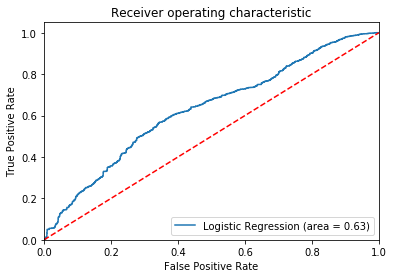

In [70]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob_lr = logreg.predict_proba(X_test)[:, 1]
logit_roc_auc = roc_auc_score(y_true, y_pred_prob_lr)
fpr, tpr, thresholds = roc_curve(y_true, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [77]:
fpr, tpr, threshold = metrics.roc_curve(y_true,y_pred_prob_lr)
roc_auc_lr = metrics.auc(fpr, tpr)
print("ROC_AUC score: {:.2}".format(roc_auc_lr))

ROC_AUC score: 0.63


## Applying XGBOOST after applying SMOTE

In [76]:
from xgboost.sklearn import XGBClassifier

xgb=XGBClassifier()
start=time()
xgb.fit(X_train_smote,y_train_smote)
end=time()
print("Trained model in {:.4f} seconds".format(end - start),'\n')

# predict the response values for the observations in X_test
start = time()
y_predicted_xgboost = xgb.predict(X_test)
end = time()
print("Made predictions in {:.4f} seconds.".format(end - start),'\n')

#displaying accuracy score of the XGBOOST model
print("Train Accuracy {:.2%}".format(accuracy_score(y_true,y_predicted_xgboost)),'\n')

#calculating probability of predicted values
y_pred_prob_xgboost = xgb.predict_proba(X_test)[:, 1]

#Compute Receiver operating characteristic (ROC)
fpr, tpr, threshold = metrics.roc_curve(y_true,y_pred_prob_xgboost)

#compute AUC ROC score
roc_auc_xgboost = metrics.auc(fpr, tpr)

print ('Classification Report: \n',classification_report(y_true,y_predicted_xgboost),'\n')

print ('Confusion Matrix: \n',confusion_matrix(y_true,y_predicted_xgboost),'\n')

print('ROC_AUC score: ',roc_auc_xgboost)

Trained model in 345.1164 seconds 

Made predictions in 0.8861 seconds. 

Train Accuracy 53.65% 

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.54      0.70    118193
           1       0.01      0.55      0.03      1413

    accuracy                           0.54    119606
   macro avg       0.50      0.54      0.36    119606
weighted avg       0.98      0.54      0.69    119606
 

Confusion Matrix: 
 [[63395 54798]
 [  638   775]] 

ROC_AUC score:  0.42483626511076267


### As we see in the above code, after applying oversampling technique (as the given data is highly imbalanced), LOGISTIC REGRESSION performs better than XGBOOST and Decision Tree models. AUC ROC is the performance metric choosen for comparison among models.

#### ROC_AUC score for LOGISTIC REGRESSION (on balanced data using SMOTE): *0.63*